**Course**: [BIO-341 _Systèmes Dynamiques en Biologie](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Felix Naef_

# Kuramoto model

In [1]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib.markers import MarkerStyle

In [2]:
def Gaussian(x, mu=0, sig=1):
    return np.exp(-(x-mu)*(x-mu) / (2*sig*sig)) / (np.sqrt(2*np.pi)*sig)

def integrand(x,K,r,sig): 
    return np.cos(x)**2 * Gaussian(K*r*np.sin(x),0,sig)

def integral(K,r,sig):
    return quad(integrand, -np.pi/2, np.pi/2, args=(K,r,sig))

def rel(K,r, sig):
    return K*integral(K,r,sig)[0]-1

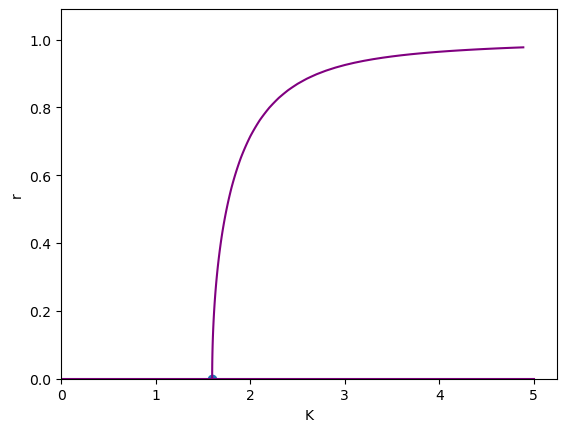

In [3]:
sigma_w = 1
Kc = 2 / np.pi * np.sqrt(2*np.pi) * sigma_w 

grid_r=np.arange(0,1.1,0.01)
grid_K=np.arange(0,5,0.1)
KK,rr=np.meshgrid(grid_K,grid_r)
V=np.array([0.])
Z=np.zeros_like(KK)
for i in range(KK.shape[0]):
    for j in range(KK.shape[1]):
        Z[i,j]=rel(KK[i,j],rr[i,j], sigma_w)
plt.contour(KK,rr,Z,V, colors='purple')
plt.plot([0,5],[0,0], color='purple')
plt.scatter(Kc,0)
plt.xlabel('K')
plt.ylabel('r')
plt.show()